In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\Hardika\Downloads\titanic.csv")

# about dataset
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 891, Columns: 12


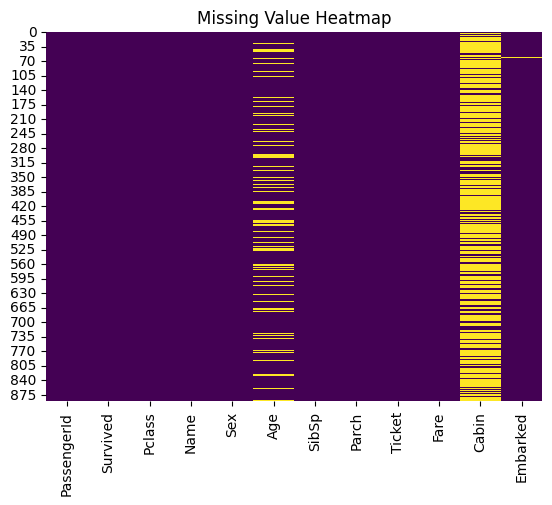

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

df.isnull().sum()


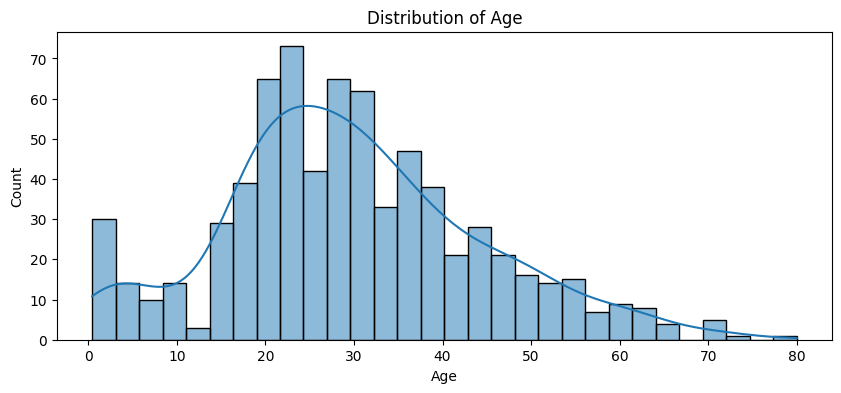

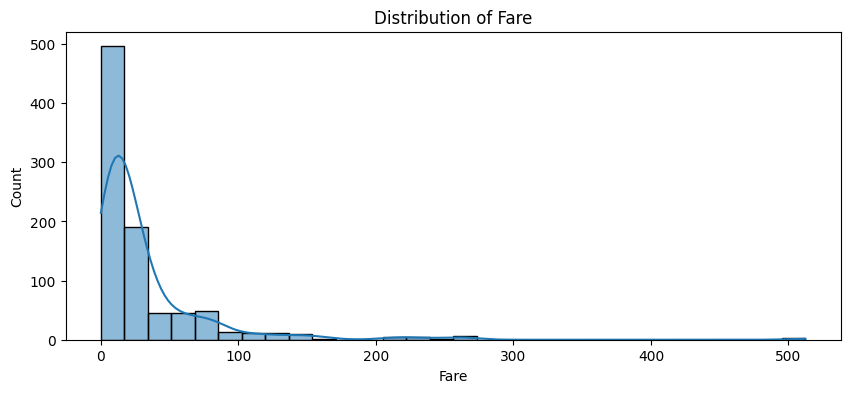

In [6]:
numerical = ['Age', 'Fare']

for col in numerical:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


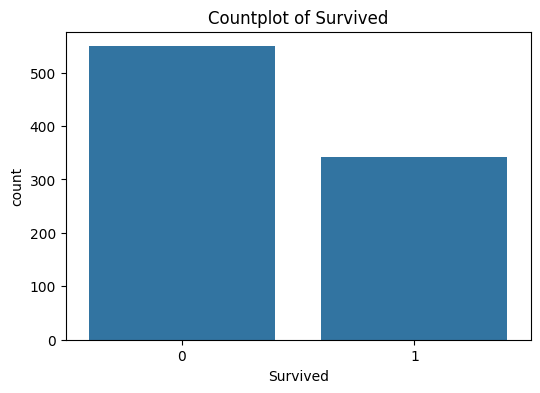

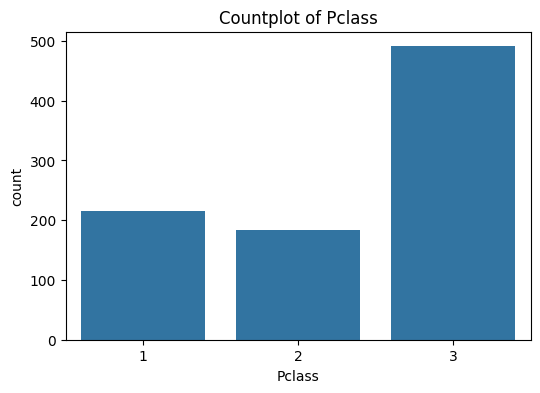

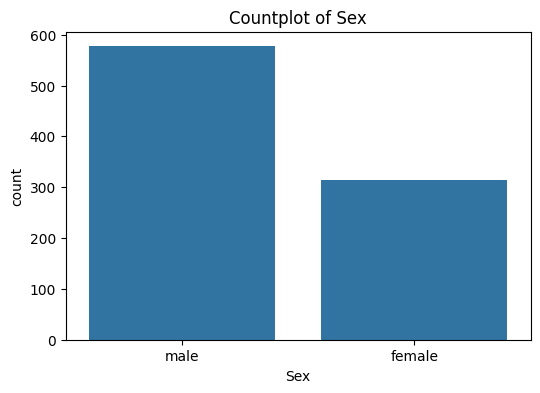

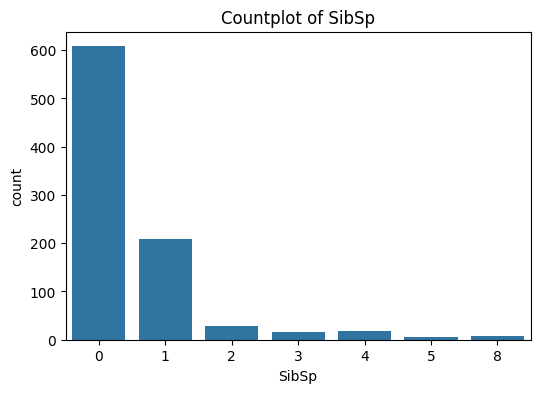

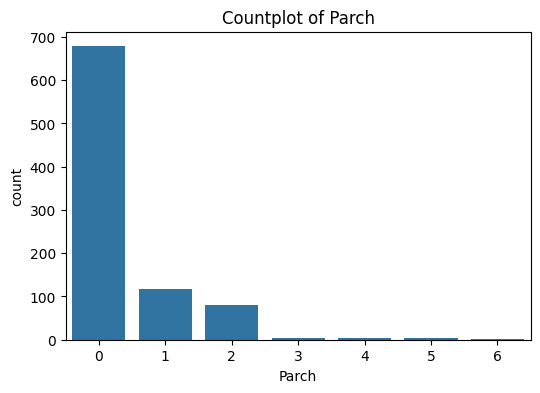

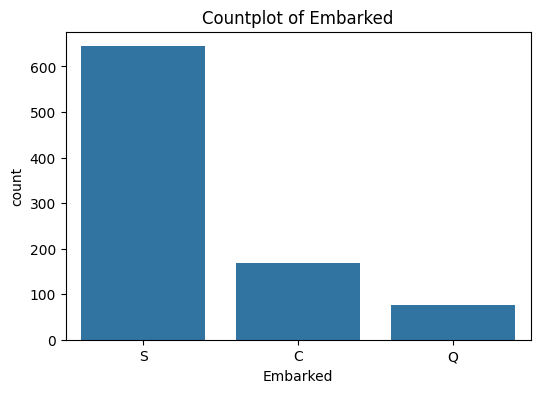

In [7]:
categorical = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()


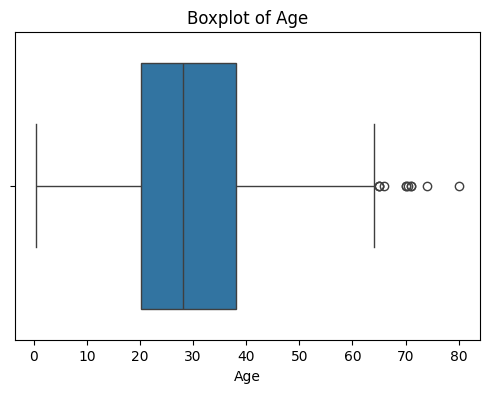

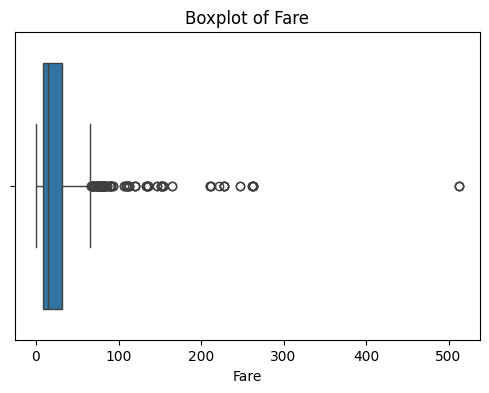

In [8]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Text(0.5, 1.0, 'Survival by Class')

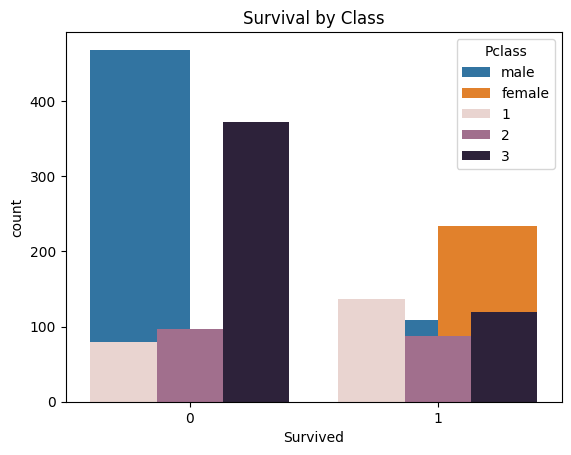

In [9]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')


Text(0.5, 1.0, 'Fare vs Survival')

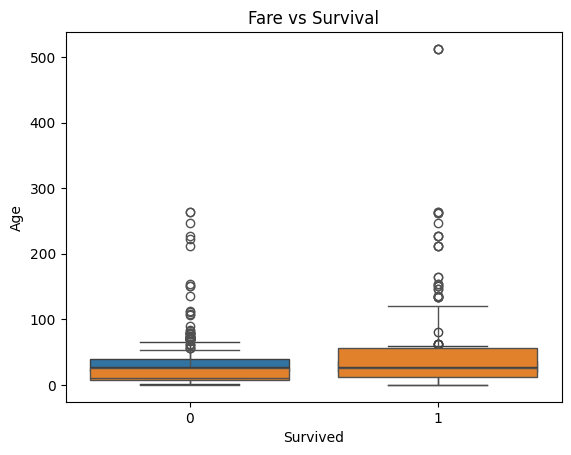

In [10]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")


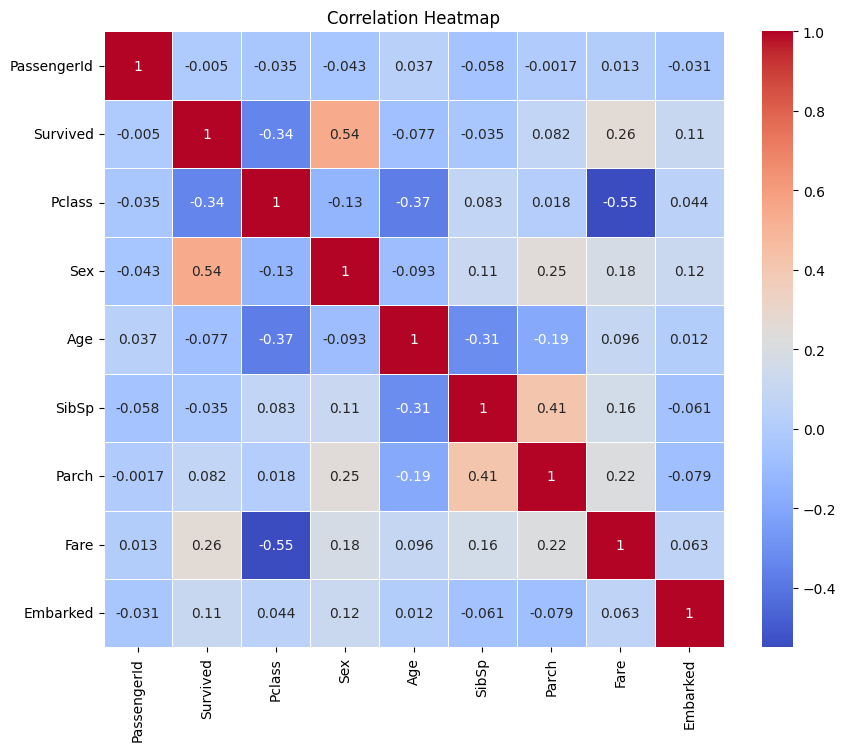

In [11]:
# Convert categorical columns to numerical for correlation
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_corr = df_corr.drop(columns=['Cabin', 'Name', 'Ticket'])

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
